In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
path = './school_data/'

In [3]:
school = pd.read_csv(path+'위해지표_전처리_출입금지(200m).csv')
school.head(10)
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   학교명                 320 non-null    object 
 1   학교코드                320 non-null    object 
 2   지역                  320 non-null    object 
 3   법정동코드               320 non-null    int64  
 4   위도                  320 non-null    float64
 5   경도                  320 non-null    float64
 6   개최횟수                320 non-null    int64  
 7   심의건수                320 non-null    int64  
 8   학교장의 자체해결건수         320 non-null    int64  
 9   피해학생수               320 non-null    int64  
 10  피해학생_보호조치건수         320 non-null    int64  
 11  가해학생수               320 non-null    int64  
 12  선도·교육
조치건수          320 non-null    int64  
 13  신체폭력                320 non-null    int64  
 14  언어폭력                320 non-null    int64  
 15  금품갈취                320 non-null    int64  
 16  강요      

In [4]:
school_info = school[['학교코드','학교명','지역','법정동코드','위도','경도']]
df = school.iloc[:,6:]
labels= np.array(school['학교코드'])

In [5]:
# 상관분석

df.corr()

,개최횟수,심의건수,학교장의 자체해결건수,피해학생수,피해학생_보호조치건수,가해학생수,선도·교육\n조치건수,신체폭력,언어폭력,금품갈취,강요,따돌림,성폭력,사이버폭력,기타,학교폭력유형건수_합계,200미터내_청소년출입금지업소개수
개최횟수,1.000000,0.657802,0.361863,0.558343,0.416174,0.535145,0.543969,0.597475,0.358901,0.198729,0.224753,0.191970,0.328218,0.236426,0.038156,0.613103,-0.010517
심의건수,0.657802,1.000000,0.545479,0.714648,0.550975,0.710222,0.672056,0.725236,0.493437,0.245761,0.394138,0.336648,0.445430,0.358849,0.103229,0.816773,-0.019904
학교장의 자체해결건수,0.361863,0.545479,1.000000,0.468200,0.379631,0.401913,0.375402,0.444303,0.314859,0.168255,0.455615,0.333571,0.232731,0.225357,0.064213,0.541419,-0.015814
피해학생수,0.558343,0.714648,0.468200,1.000000,0.801331,0.710578,0.670935,0.590542,0.413154,0.251098,0.478213,0.351087,0.445020,0.395398,0.094197,0.736382,-0.064370
피해학생_보호조치건수,0.416174,0.550975,0.379631,0.801331,1.000000,0.571813,0.583642,0.481926,0.394817,0.205837,0.418531,0.416336,0.359587,0.283404,0.113385,0.635212,-0.054803
가해학생수,0.535145,0.710222,0.401913,0.710578,0.571813,1.000000,0.884803,0.663406,0.505229,0.250123,0.319188,0.294078,0.390969,0.276046,0.098494,0.750871,-0.030659
선도·교육\n조치건수,0.543969,0.672056,0.375402,0.670935,0.583642,0.884803,1.000000,0.676578,0.507559,0.294954,0.301998,0.240097,0.432791,0.257744,0.081542,0.759752,-0.014678
신체폭력,0.597475,0.725236,0.444303,0.590542,0.481926,0.663406,0.676578,1.000000,0.453201,0.429416,0.236045,0.123324,0.306680,0.127943,-0.001797,0.853334,-0.034809
언어폭력,0.358901,0.493437,0.314859,0.413154,0.394817,0.505229,0.507559,0.453201,1.000000,0.122855,0.270585,0.184536,0.155812,0.111663,-0.005535,0.695545,-0.018390
금품갈취,0.198729,0.245761,0.168255,0.251098,0.205837,0.250123,0.294954,0.429416,0.122855,1.000000,0.250517,0.059202,0.149296,0.047487,0.038735,0.462641,-0.001083


In [6]:
# feature 선정

df = df[['학교폭력유형건수_합계','200미터내_청소년출입금지업소개수','개최횟수','심의건수','피해학생수','가해학생수','신체폭력']]

***
## K-Means Clustering

In [7]:
# 표준화

sd = StandardScaler()
df_sd = pd.DataFrame(sd.fit_transform(df))
df_sd.index = labels

In [8]:
# silhouette_score : 군집타당성 점수 = 1에 가까울수록 군집이 잘 이루어짐

from sklearn.metrics import silhouette_score

k_range = range(2, 20)

best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(df_sd)
    clusters = kmeans.predict(df_sd)
    
    score = silhouette_score(df_sd, clusters)
    print('k: ', k, 'score: ', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n: ', best_n, 'best score: ', best_silhouette_score)

k:  2 score:  0.5062103112027584
k:  3 score:  0.3141625555869077
k:  4 score:  0.3416260069007815
k:  5 score:  0.314701548562123
k:  6 score:  0.3126366419713412
k:  7 score:  0.2904997606640421
k:  8 score:  0.2765245428853543
k:  9 score:  0.28992512306437523
k:  10 score:  0.24374768037430408
k:  11 score:  0.25634253651046335
k:  12 score:  0.2244719449512227
k:  13 score:  0.26796649743060763
k:  14 score:  0.24832958444852365
k:  15 score:  0.2388118114615855
k:  16 score:  0.26252728368431943
k:  17 score:  0.22180276941775787
k:  18 score:  0.2253946723284605
k:  19 score:  0.25937401273768723
best n:  2 best score:  0.5062103112027584


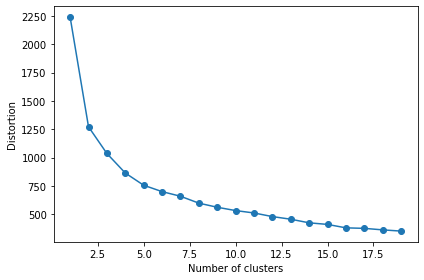

In [9]:
# elbow method

dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,init='k-means++',
           n_init=10, max_iter=300, random_state=2021)
    k.fit(df_sd)
    dist.append(k.inertia_)


plt.plot(range(1,20), dist, marker='o')

plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [10]:
df_sd_arr = df_sd.values

kmeans = KMeans(n_clusters = 3,random_state=2021).fit(df_sd_arr)
kmeans.cluster_centers_

array([[-0.56242591,  0.11829875, -0.44444747, -0.58443908, -0.52101878,
        -0.59583723, -0.55332724],
       [ 0.26173002, -0.23007687,  0.23369601,  0.43144999,  0.33903191,
         0.46821566,  0.31431545],
       [ 2.21627317,  0.00543307,  1.67897677,  1.87331831,  1.79290049,
         1.83346232,  2.02732209]])

In [11]:
# cluster label
df_sd['cluster'] = kmeans.labels_
df_sd

,0,1,2,3,4,5,6,cluster
S010000373,-0.915016,-0.135188,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S010000375,1.448221,-0.595401,-0.513466,1.972370,0.444270,-0.612247,2.402405,1
S010000376,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S000003540,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S010000581,0.266603,-0.135188,0.975740,0.486592,0.195292,1.040082,0.602008,1
...,...,...,...,...,...,...,...,...
S010000436,-0.206045,0.325025,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,0
S010000585,-0.442368,-0.595401,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0
S010005523,-0.206045,-0.595401,-0.513466,0.189437,0.444270,-0.612247,0.151909,1
S010000592,5.938371,0.094919,1.472143,1.080903,0.942226,1.748223,6.903397,2


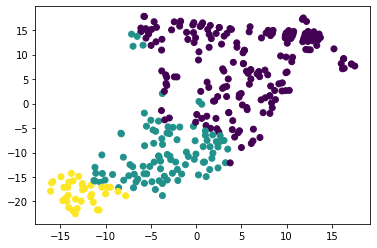

In [16]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(df_sd.iloc[:,:7])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

In [17]:
# column name 변경

df_sd.reset_index(inplace=True)
df_sd.rename(columns={'index':'학교코드',0:'학교폭력유형_계',1:'200미터내_청소년출입금지업소개수',2:'개최횟수',3:'심의건수',4:'피해학생수',5:'가해학생수',6:'신체폭력'},inplace=True)

df_sd['cluster'].value_counts()  # cluster별 개수

0    187
1     97
2     36
Name: cluster, dtype: int64

In [18]:
hazard = pd.merge(school_info, df_sd, on='학교코드', how='left')

In [19]:
# cluster 평균값 산출

hazard_score = hazard[['학교폭력유형_계','200미터내_청소년출입금지업소개수','개최횟수','심의건수','피해학생수','가해학생수','신체폭력','cluster']].groupby('cluster').mean()

hazard_score

,학교폭력유형_계,200미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력
cluster,,,,,,,
0,-0.562426,0.118299,-0.444447,-0.584439,-0.521019,-0.595837,-0.553327
1,0.261730,-0.230077,0.233696,0.431450,0.339032,0.468216,0.314315
2,2.216273,0.005433,1.678977,1.873318,1.792900,1.833462,2.027322


In [20]:
# cluster별 지역수 확인
tmp = hazard[hazard['cluster']==0]
tmp['지역'].nunique()

25

***
## 결과 해석

* **cluster2 > cluster1 > cluster0**

- cluster 0 : 학교폭력 발생 건수가 낮고, 200m 내 청소년 유해업소수가 많음
- cluster 1 : 학교폭력 발생 건수가 약간 높음, 200m 내 청소년 유해업소수가 적음
- cluster 2 : 학교폭력 발생 건수가 전체적으로 높음, 200m 내 청소년 유해업소수가 상대적으로 많음

***
## 위해지표 점수 산출

### 1차 점수
- '심의건수'는 학교폭력심의위원회가 개최되어 학교폭력 사안에 대한 심의건수로 위해지표에서 가장 중요한 변수로 선택함.

In [23]:
rank = hazard_score.sort_values('심의건수').index
rank

Int64Index([0, 1, 2], dtype='int64', name='cluster')

In [24]:
# 군집별 점수부여

hazard['score_1st'] = ''

for i in range(len(hazard)):
    if hazard['cluster'][i]==rank[0]:
        hazard['score_1st'][i]=0.3
    elif hazard['cluster'][i]==rank[1]:
        hazard['score_1st'][i]=0.6
    elif hazard['cluster'][i]==rank[2]:
        hazard['score_1st'][i]=1
        
hazard

,학교코드,학교명,지역,법정동코드,위도,경도,학교폭력유형_계,200미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력,cluster,score_1st
0,S010000373,개포고등학교,강남구,1168010300,37.484959,127.059405,-0.915016,-0.135188,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.3
1,S010000375,경기고등학교,강남구,1168010500,37.517566,127.056074,1.448221,-0.595401,-0.513466,1.972370,0.444270,-0.612247,2.402405,1,0.6
2,S010000376,경기여자고등학교,강남구,1168010300,37.486887,127.065567,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.3
3,S000003540,국립국악고등학교,강남구,1168010300,37.476230,127.051476,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.3
4,S010000581,단국대학교부속소프트웨어고등학교,강남구,1168010600,37.495617,127.057767,0.266603,-0.135188,0.975740,0.486592,0.195292,1.040082,0.602008,1,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,S010000436,무학여자고등학교,성동구,1120010700,37.556768,127.033599,-0.206045,0.325025,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,0,0.3
316,S010000585,서울방송고등학교,성동구,1120011300,37.547773,127.011036,-0.442368,-0.595401,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0,0.3
317,S010005523,성수고등학교,성동구,1120011400,37.547342,127.038253,-0.206045,-0.595401,-0.513466,0.189437,0.444270,-0.612247,0.151909,1,0.6
318,S010000592,성수공업고등학교,성동구,1120011500,37.540540,127.051298,5.938371,0.094919,1.472143,1.080903,0.942226,1.748223,6.903397,2,1


In [25]:
hazard.to_csv(path+'hazard_score_1st.csv', index=False)

### 2차 점수
- 구별 청소년(15-19세) 인구밀도를 산출하여, 청소년 인구밀도가 높은 학교순으로 높은 점수를 부여함

In [3]:
# 위해지표 데이터에 학교별 동구분 컬럼 추가
hazard = pd.read_csv(path+'hazard_score_1st.csv')

dong = pd.read_csv(path+'서울시고등학교_동구분.csv', encoding = 'cp949')
dong.rename(columns={'정보공시 \n 학교코드':'학교코드'},inplace=True)
dong = dong[['학교코드','동']]

hazard = pd.merge(hazard,dong,how='inner',on='학교코드')
hazard

,학교코드,학교명,지역,법정동코드,위도,경도,학교폭력유형_계,200미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력,cluster,score_1st,동
0,S010000373,개포고등학교,강남구,1168010300,37.484959,127.059405,-0.915016,-0.135188,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.3,개포2동
1,S010000375,경기고등학교,강남구,1168010500,37.517566,127.056074,1.448221,-0.595401,-0.513466,1.972370,0.444270,-0.612247,2.402405,1,0.6,삼성동
2,S010000376,경기여자고등학교,강남구,1168010300,37.486887,127.065567,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.3,개포2동
3,S000003540,국립국악고등학교,강남구,1168010300,37.476230,127.051476,-0.915016,-0.595401,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.3,개포4동
4,S010000581,단국대학교부속소프트웨어고등학교,강남구,1168010600,37.495617,127.057767,0.266603,-0.135188,0.975740,0.486592,0.195292,1.040082,0.602008,1,0.6,대치1동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,S010000436,무학여자고등학교,성동구,1120010700,37.556768,127.033599,-0.206045,0.325025,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,0,0.3,행당1동
316,S010000585,서울방송고등학교,성동구,1120011300,37.547773,127.011036,-0.442368,-0.595401,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0,0.3,옥수동
317,S010005523,성수고등학교,성동구,1120011400,37.547342,127.038253,-0.206045,-0.595401,-0.513466,0.189437,0.444270,-0.612247,0.151909,1,0.6,성수1가1동
318,S010000592,성수공업고등학교,성동구,1120011500,37.540540,127.051298,5.938371,0.094919,1.472143,1.080903,0.942226,1.748223,6.903397,2,1.0,성수2가1동


In [4]:
hazard['동'].nunique()

189

In [5]:
# 청소년 인구밀도 산출

df = pd.read_csv(path+'청소년인구밀도_동.csv', encoding = 'cp949')
df['청소년인구밀도'] = df['청소년인구수(15-19세)']/df['동별 면적']

people_density = df[['동','청소년인구밀도']]
people_density

,동,청소년인구밀도
0,청운효자동,263.424125
1,사직동,302.439024
2,삼청동,70.469799
3,부암동,223.348018
4,평창동,113.190530
...,...,...
419,성내2동,1135.820896
420,성내3동,1722.535211
421,길동,874.654378
422,둔촌1동,4.347826


In [6]:
# 위해지표 1차 점수 데이터에 청소년인구밀도 병합

hazard_2nd = pd.merge(hazard, people_density, how='inner', on='동')
hazard_2nd['동'].nunique()
# hazard_2nd.isnull().sum()

189

In [7]:
## 위해지표 산출을 위한 2차 점수 산출

hazard_2nd['score_2nd'] = float()

for i in range(len(hazard_2nd)):
    for k in range(3):
        rank_lis = sorted(list(set(hazard_2nd[hazard_2nd['cluster']==k]['청소년인구밀도'])), reverse=True) #한 군집내의 모든 인구밀도 내림차순 정렬
        for j in range(len(rank_lis)): #내림차순 정렬한 리스트의 인덱스 순서대로 적은 점수를 차감
            if hazard_2nd['청소년인구밀도'][i] == rank_lis[j]:
                hazard_2nd['score_2nd'][i] = round((hazard_2nd['score_1st'][i]-(j/len(rank_lis))*0.2)*10,2) # 10점 만점으로 산출

In [8]:
hazard_2nd.info()
hazard_2nd.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 0 to 319
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   학교코드                320 non-null    object 
 1   학교명                 320 non-null    object 
 2   지역                  320 non-null    object 
 3   법정동코드               320 non-null    int64  
 4   위도                  320 non-null    float64
 5   경도                  320 non-null    float64
 6   학교폭력유형_계            320 non-null    float64
 7   200미터내_청소년출입금지업소개수  320 non-null    float64
 8   개최횟수                320 non-null    float64
 9   심의건수                320 non-null    float64
 10  피해학생수               320 non-null    float64
 11  가해학생수               320 non-null    float64
 12  신체폭력                320 non-null    float64
 13  cluster             320 non-null    int64  
 14  score_1st           320 non-null    float64
 15  동                   320 non-null    object 
 16  청소년인구밀도 

학교코드                  0
학교명                   0
지역                    0
법정동코드                 0
위도                    0
경도                    0
학교폭력유형_계              0
200미터내_청소년출입금지업소개수    0
개최횟수                  0
심의건수                  0
피해학생수                 0
가해학생수                 0
신체폭력                  0
cluster               0
score_1st             0
동                     0
청소년인구밀도               0
score_2nd             0
dtype: int64

In [9]:
# 최종 위해지표에 필요한 column만 추출

hazard_fin = hazard_2nd[['학교코드','학교명','지역','동','위도','경도','score_2nd']]
hazard_fin.sort_values(by=['score_2nd'], ascending=[False]).head(30)

,학교코드,학교명,지역,동,위도,경도,score_2nd
114,S010000386,계성고등학교,성북구,길음1동,37.607710,127.020310,10.00
130,S010005182,방산고등학교,송파구,방이1동,37.508400,127.120472,9.94
50,S010000389,공항고등학교,강서구,방화1동,37.570122,126.818420,9.88
23,S010000568,휘문고등학교,강남구,대치2동,37.505109,127.061420,9.82
116,S010000629,고명외식고등학교,성북구,돈암1동,37.597320,127.020190,9.76
181,S010000467,선정고등학교,은평구,갈현2동,37.618704,126.909031,9.70
280,S010000588,서울공업고등학교,동작구,대방동,37.501902,126.922364,9.64
228,S010005364,원묵고등학교,중랑구,묵1동,37.615506,127.086204,9.58
210,S010000644,서일문화예술고등학교,종로구,창신3동,37.579380,127.012793,9.52
137,S010000593,송파공업고등학교,송파구,거여1동,37.491476,127.142528,9.45


In [12]:
print(hazard_indicator['score_2nd'].max())
print(hazard_indicator['score_2nd'].min())

10.0
1.02


In [10]:
hazard_indicator = hazard_fin.to_csv(path+'hazard_indicator.csv', index=False)

In [11]:
hazard_indicator = pd.read_csv(path+'hazard_indicator.csv')
hazard_indicator

,학교코드,학교명,지역,동,위도,경도,score_2nd
0,S010000373,개포고등학교,강남구,개포2동,37.484959,127.059405,1.66
1,S010000376,경기여자고등학교,강남구,개포2동,37.486887,127.065567,1.66
2,S010000594,수도전기공업고등학교,강남구,개포2동,37.484938,127.064480,1.66
3,S010000375,경기고등학교,강남구,삼성동,37.517566,127.056074,4.48
4,S010000394,광신고등학교,관악구,삼성동,37.464476,126.925939,4.48
...,...,...,...,...,...,...,...
315,S010000557,한양대학교사범대학부속고등학교,성동구,사근동,37.561919,127.042326,1.52
316,S010006382,도선고등학교,성동구,왕십리도선동,37.567131,127.026809,5.31
317,S010000436,무학여자고등학교,성동구,행당1동,37.556768,127.033599,2.28
318,S010000585,서울방송고등학교,성동구,옥수동,37.547773,127.011036,1.46
